# Bônus
Esse notebook contém extras que não foram pedidos nos requisitos do projeto.

## Restringindo o dataframe apenas para amostras dentro dos EUA
Fizemos uma análise dos pontos de latitude e longitude e encontramos que existem registros de fora dos Estados Unidos, como pode ser observado na primeira figura. Para limpar esses dados realizou-se uma pesquisa dos limites de latitude e longitude dos EUA:

TOP_LEFT_PT = (52.920556, -172.437778)  
TOP_RIGHT_PT = (71.388889, -156.479167)  
BOTTOM_RIGHT_PT = (44.816667, -66.916667)  
BOTTOM_LEFT_PT = (18.744167, -155.681111)  

Esses pontos estão definidos no arquivo Constants.py. Dessa forma checamos quais amostras estão dentro dos intervalos de latitude e longitude, obtendo o um dataframe livre dos pontos fora dos Estados Unidos.

In [1]:
from Utils import *
from tqdm import tqdm

df = pd.read_csv(CLEAN_VEHICLES_2_DATASET)

<AxesSubplot:xlabel='long', ylabel='lat'>

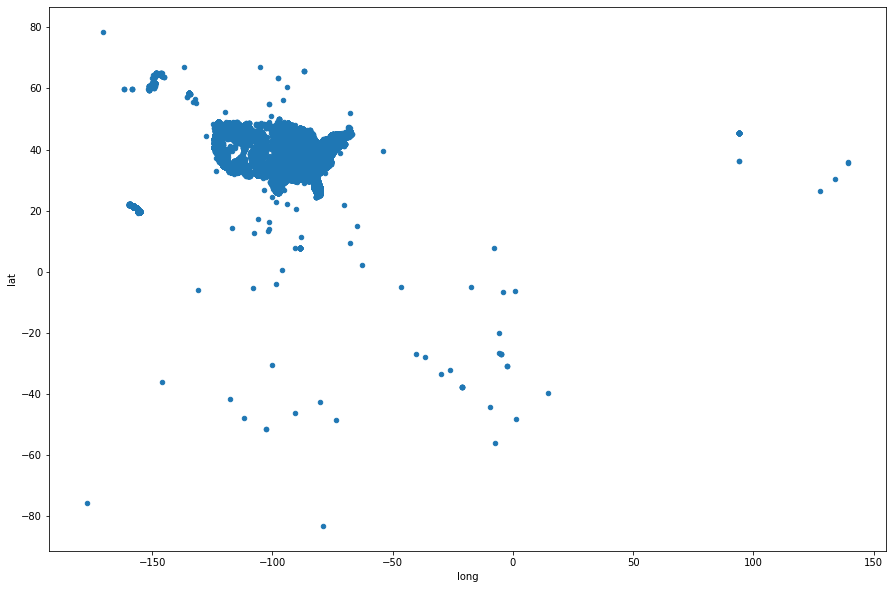

In [2]:
# Dataframe com pontos fora dos EUA, possivelmente outliers, pois o craig list do nosso dataset é apenas
# de anúncios nos EUA.
df.plot.scatter(x='long', y='lat', figsize=(15,10))

<AxesSubplot:xlabel='long', ylabel='lat'>

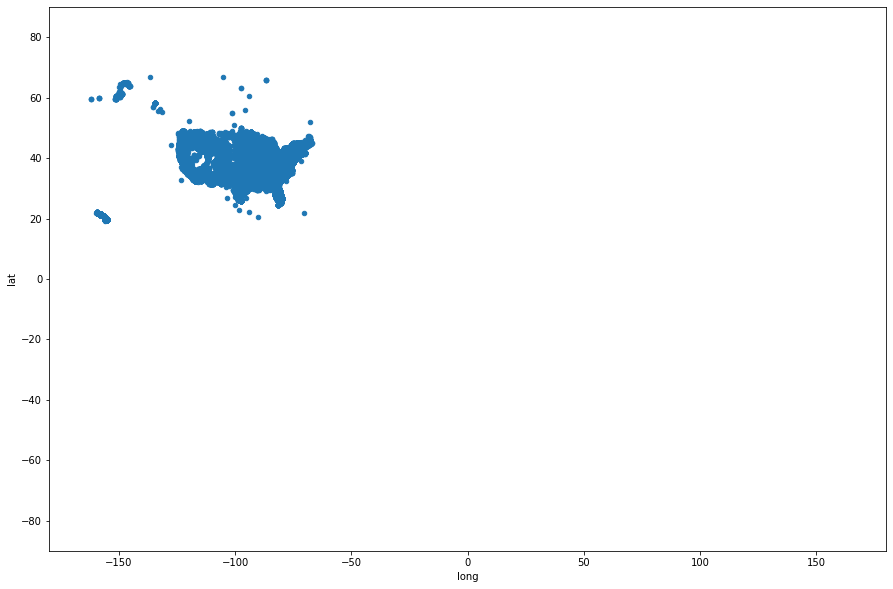

In [3]:
# Dataframe livre de anúncios vindos de fora dos EUA
usa_df = get_samples_in_usa(df)
usa_df.plot.scatter(x='long', y='lat', ylim=[-90,90], xlim=[-180,180], figsize=(15,10))

In [5]:
# Redução de 0,5% no tamanho do dataset
len(usa_df) / len(df)

0.9996494264490373

In [6]:
df = usa_df
df.to_csv(CLEAN_VEHICLES_2_DATASET, index=False)

## Plot interativo de mapa

In [1]:
import geopandas as gpd
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts
from cartopy import crs 
import geoviews.tile_sources as gts
gv.extension('bokeh', 'matplotlib')

ModuleNotFoundError: No module named 'geoviews'